퍼스널컬러 종류
- 봄웜톤: 봄웜브라이트, 봄웜라이트
- 여름쿨톤: 여름쿨라이트,여름쿨뮤트
- 가을웜톤: 가을웜뮤트, 가을웜딥
- 겨울쿨톤: 겨울쿨딥, 겨울쿨브라이트

In [1]:
# !pip install selenium
from selenium import webdriver
from urllib.request import urlopen
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import urllib.request
import os
import csv

In [2]:
driver = webdriver.Chrome() # 크롬드라이버 실행
url = "https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl" # 크롬드라이버에서 url로 접속
driver.get(url)
time.sleep(2) # 페이지 로딩을 위해 대기

search_q_list = ["봄웜브라이트 코디","봄웜라이트 코디","여름쿨라이트 코디","여름쿨뮤트 코디",
                 "가을웜뮤트 코디","가을웜딥 코디","겨울쿨딥 코디","겨울쿨브라이트 코디"]

img_root = "C:/Users/wjdth/kuiai/data/color_images/"
for i in range(len(search_q_list)):
    #검색어 입력
    elem = driver.find_element(By.NAME,"q")
    elem.clear()
    elem.send_keys(search_q_list[i])
    elem.submit()
    time.sleep(3)
    
    SCROLL_PAUSE_TIME = 1
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                driver.find_element_by_css_selector(".mye4qd").click()
            except:
                break
        last_height = new_height
    
    #이미지 저장
    images = driver.find_elements(By.CSS_SELECTOR,".rg_i.Q4LuWd")
    count = 1
    for image in images:
        try:
            image.click()
            time.sleep(3)
            img_url = driver.find_element(By.XPATH,"//*[@id='Sva75c']/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div[2]/div[1]/div[1]/div[2]/div/a/img").get_attribute('src') 
            img_path = img_root + search_q_list[i] + "_" + str(count) + ".jpg"
            urllib.request.urlretrieve(img_url,img_path)
            count += 1
            if count>100: 
                break
        except:
            print("Image save failed, {}".format(search_q_list[i]))
            continue
            
driver.close()

Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜브라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 봄웜라이트 코디
Image save failed, 여름쿨라이트 코디
Image save failed, 여름쿨라이트 코디
Image save failed, 여름쿨라이트 코디
Image save failed, 여름쿨라이트 코디
Image save failed, 여름쿨라이트 코디
Image save failed, 여름쿨라이트 코디
Image save failed, 여름쿨라이트 코

In [45]:
#관련없는 이미지 삭제 후 annotation 생성
search_q_list = ["봄웜브라이트 코디","봄웜라이트 코디","여름쿨라이트 코디","여름쿨뮤트 코디",
                 "가을웜뮤트 코디","가을웜딥 코디","겨울쿨딥 코디","겨울쿨브라이트 코디"]

filename = "C:/Users/wjdth/kuiai/data/color_annotation.csv"
f = open(filename,"w",encoding="utf-8-sig",newline="")
writer = csv.writer(f)
writer.writerow(["path","label"])

folder_path = 'C:/Users/wjdth/kuiai/data/color_images/'
for f_name in os.listdir(folder_path):
    img_path = folder_path + f_name
    for i,color_name in enumerate(search_q_list):
        if color_name in f_name:
            writer.writerow([img_path,i]) #annotation 저장 (이미지 path,label)


1    32
7    29
6    26
0    24
2    22
4    16
3    16
5    15
Name: label, dtype: int64


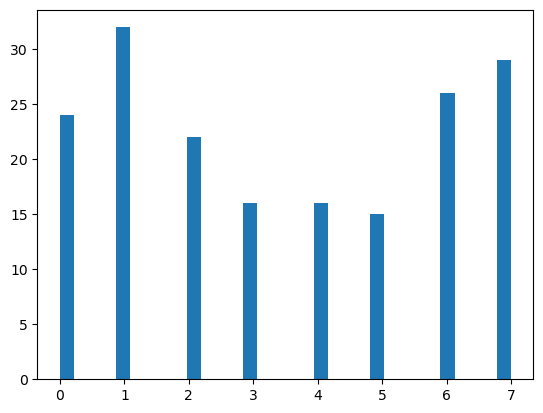

In [46]:
import matplotlib.pyplot as plt
labels_df = pd.read_csv("C:/Users/wjdth/kuiai/data/color_annotation.csv")
print(labels_df['label'].value_counts())
plt.hist(labels_df['label'],bins=32,histtype='bar')
plt.show()

In [47]:
#make train labels
filename = "C:/Users/wjdth/kuiai/data/train_labels.csv"
f = open(filename,"w",encoding="utf-8-sig",newline="")
writer = csv.writer(f)
writer.writerow(["path","label"])

folder_path = 'C:/Users/wjdth/kuiai/data/train/'
for f_name in os.listdir(folder_path):
    img_path = folder_path + f_name
    for i,color_name in enumerate(search_q_list):
        if color_name in f_name:
            writer.writerow([img_path,i]) #annotation 저장 (이미지 path,label)


In [49]:
#make test labels
filename = "C:/Users/wjdth/kuiai/data/test_labels.csv"
f = open(filename,"w",encoding="utf-8-sig",newline="")
writer = csv.writer(f)
writer.writerow(["path","label"])

folder_path = 'C:/Users/wjdth/kuiai/data/test/'
for f_name in os.listdir(folder_path):
    img_path = folder_path + f_name
    for i,color_name in enumerate(search_q_list):
        if color_name in f_name:
            writer.writerow([img_path,i]) #annotation 저장 (이미지 path,label)


In [2]:
import pandas as pd
#get influencer name list
influencer_list = pd.read_csv('influencer_list.csv')
influencer_list['id']

0         @by_he.nique
1         @c_eunnnnnnn
2             @oytoyt_
3               @so_j2
4            @eungil_j
            ...       
95           @loolinmx
96    @__v.yuum_look__
97              @slglf
98           @hawl_0.s
99           @166.ootd
Name: id, Length: 100, dtype: object

In [51]:
#unzip
import zipfile
zipfile1 = "data/sample1.zip"
zipfile2 = "data/sample2.zip"
folder_path = "data/influencer_imgs/"
with zipfile.ZipFile(zipfile1, 'r') as zip_ref:
    zip_ref.extractall(folder_path)
with zipfile.ZipFile(zipfile2, 'r') as zip_ref:
    zip_ref.extractall(folder_path)